In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sys

In [2]:
pip install import-ipynb

Processing c:\users\xps\appdata\local\pip\cache\wheels\06\7e\ad\1cb03e935234186825cefc7e2c8f3451b4f654b5bc72232a7b\import_ipynb-0.1.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
import import_ipynb
import AdjacencyList as adja

importing Jupyter notebook from AdjacencyList.ipynb


In [4]:
adj = adja.generateAdjacencyList()
matrix = """
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
"""
mat = [[int(c) for c in line] for line in matrix.strip().split('\n')]

In [5]:
import import_ipynb
import player as p

importing Jupyter notebook from player.ipynb
importing Jupyter notebook from convert.ipynb
importing Jupyter notebook from nodeDelete.ipynb
importing Jupyter notebook from backtracking.ipynb


In [6]:
import import_ipynb
import wall as w

importing Jupyter notebook from wall.ipynb


In [7]:
import import_ipynb
import dfs as dfspath
import bfs as bfspath
import bfs2 as bfspath2
import backtracking as backtrackingpath

importing Jupyter notebook from dfs.ipynb
importing Jupyter notebook from bfs.ipynb
importing Jupyter notebook from bfs2.ipynb
53
[45, 46, 47, 48, 49, 50, 51, 52, 53]


In [8]:
import import_ipynb
import nodeDelete as nd

In [9]:
class Game:
    def __init__(self, nop):
        self.nop = nop

    #Note, character goes by 2 spaces, because one space is for the walls
    def drawQuoridorBoard(self):
        bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
        #total of 17x17 board
        bo += 0.8 #opactiy of black spaces
        bo[ ::2, ::2] = 1
        bo[0::2, 0::2] = 1
        
        fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
        ax.imshow(bo, interpolation='nearest')

        #add players:
        Game.addPlayers(self.nop)

        Game.drawPlayers(ax)

        #add walls:
        w.addWalls(self.nop)
        w.drawWalls(ax)

        ax.set(xticks=[], yticks=[])
        ax.axis('image')

        plt.show()
        
    def game(self):
        bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
        #total of 17x17 board
        bo += 0.8 #opactiy of black spaces
        bo[ ::2, ::2] = 1
        bo[0::2, 0::2] = 1

        fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
        ax.imshow(bo, interpolation='nearest')

        #since the game already started, you just draw the players
        Game.drawPlayers(ax)

        #just draw the walls
        w.drawWalls(ax)

        #checks if a player reached the opposite side
        gameover = self.checkWinner()

        ax.set(xticks=[], yticks=[])
        ax.axis('image')

        plt.show()
        return gameover

    def checkWinner(self):
        finish_line = [16,0,16,0]
        for pl in p.players:
            i = pl.id - 1
            if (pl.id <= 2):
                if(pl.x == finish_line[i]):
                    print("GAME OVER")
                    print("Player", pl.id, "wins")
                    return True
            else:
                if(pl.y == finish_line[i]):
                    print("GAME OVER")
                    print("Player", pl.id, "wins")
                    return True
        return False

    def addPlayers(nop):
        initState = [[0, 8, 'royalblue'], [16,8,'limegreen'], 
                 [8, 0, 'gold'],     [8, 16, 'deeppink']]
        
        for i in range(nop):
            pl = p.Player(initState[i][0], initState[i][1], initState[i][2], i+1)
            p.players.append(pl)

    def drawPlayers(ax):
        for pl in p.players:
            ax.text(pl.x, pl.y, u'\u265F', size=30, 
            ha='center', va='center', color=pl.color)

In [10]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 20 number of players (2 or 4)

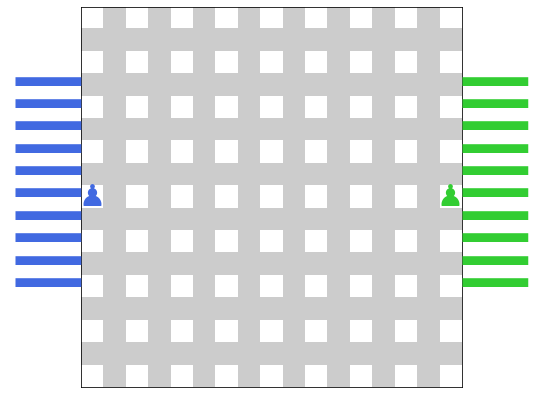

36
[44, 43, 42, 41, 40, 39, 38, 37, 36]
El bot DFS 1 tomará el camino: [36, 45, 54, 63, 72, 73, 74, 75, 76, 77, 78, 79, 80]
El bot BFS 2 tomará el camino: [44, 43, 42, 41, 40, 39, 38, 37, 36]
Player:  1 moved using the path


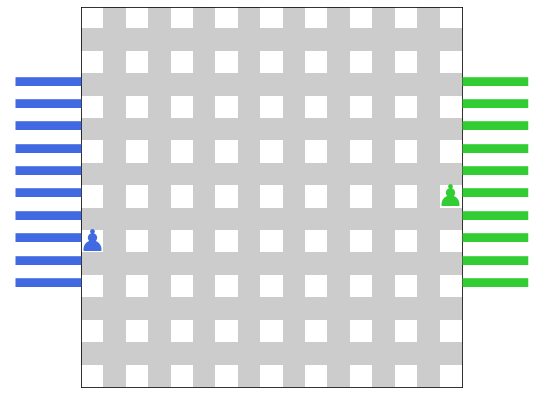

Player:  2 moved using the path


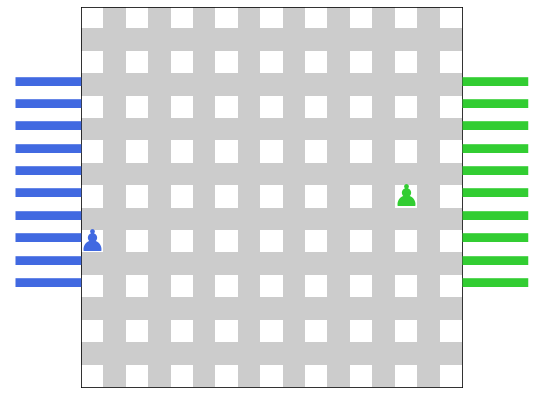

Player:  1 moved using the path


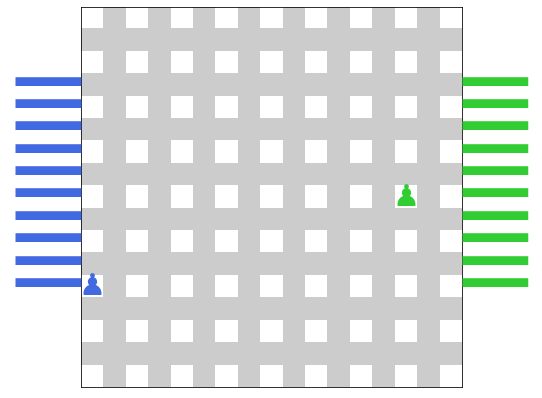

Player:  2 moved using the path


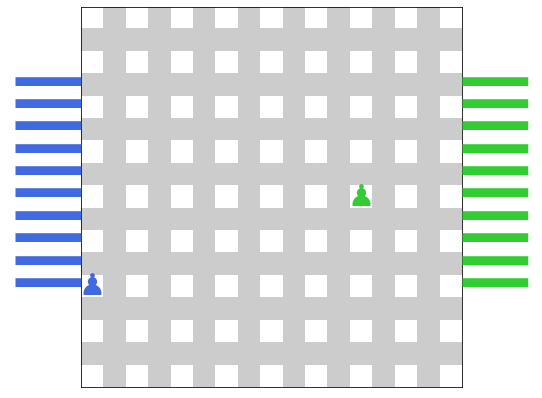

Player:  1 moved using the path


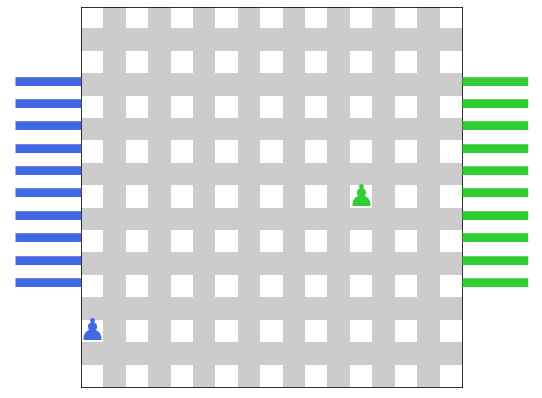

Player:  2 moved using the path


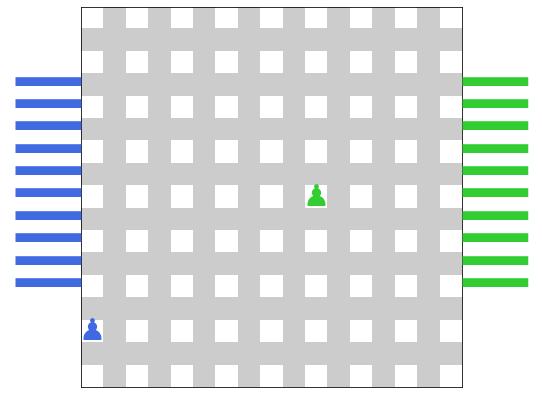

Player:  1 moved using the path


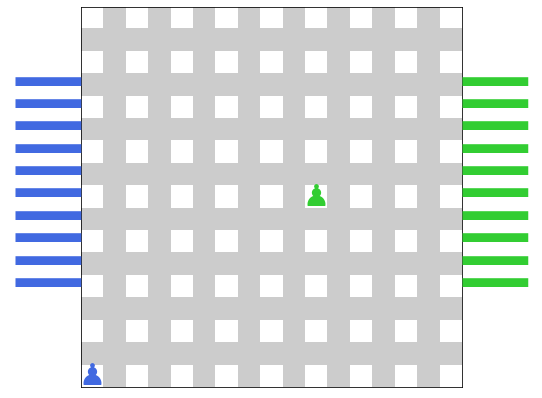

Player:  2 moved using the path


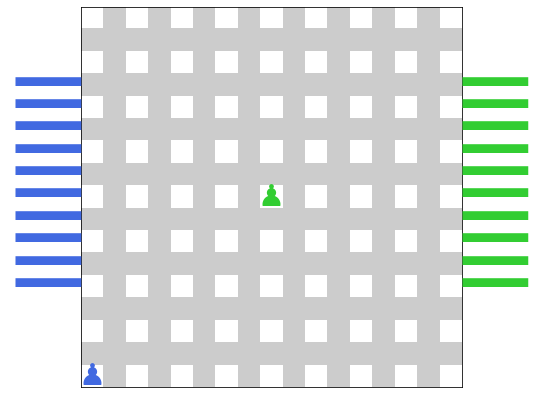

Player:  1 moved using the path


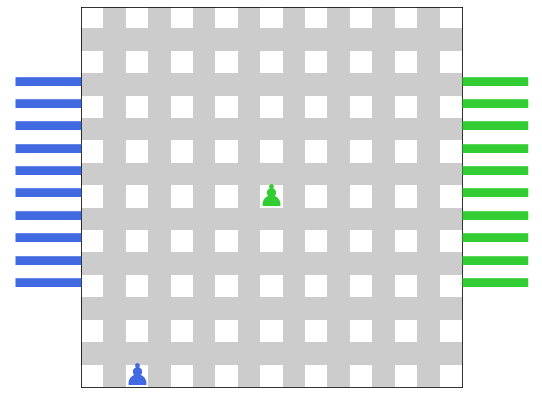

Player:  2 moved using the path


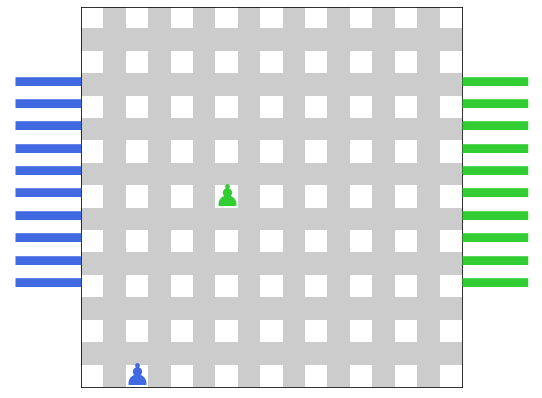

Player:  1 moved using the path


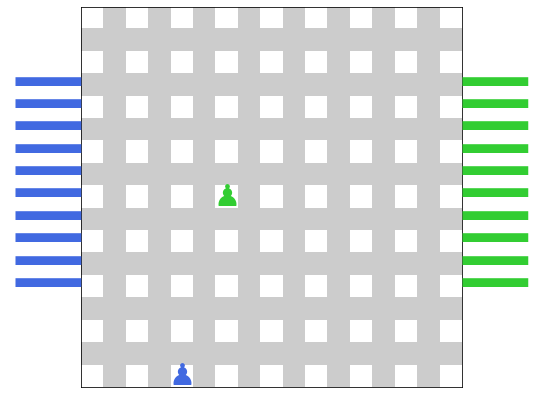

Player:  2 moved using the path


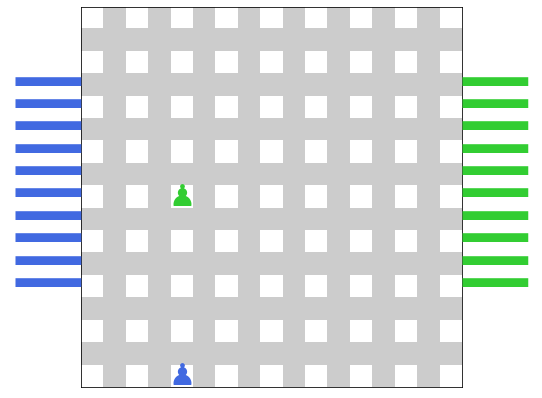

Player:  1 moved using the path


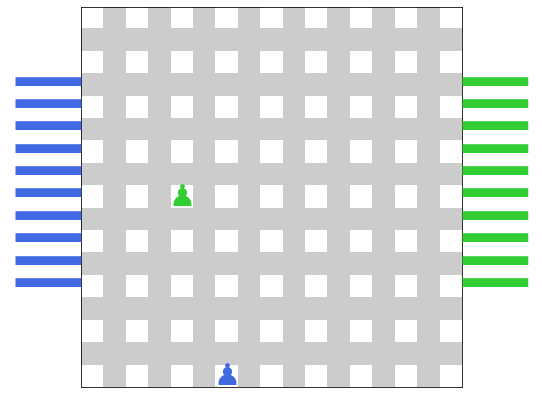

Player:  2 moved using the path


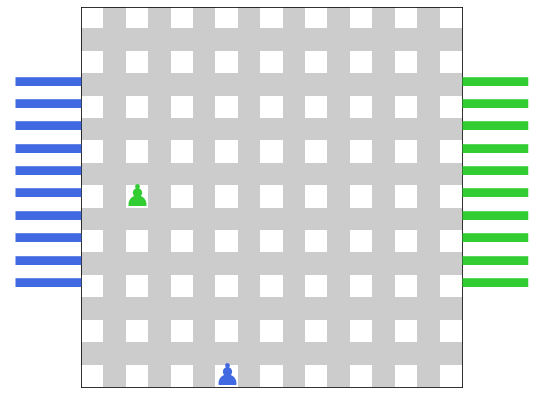

Player:  1 moved using the path


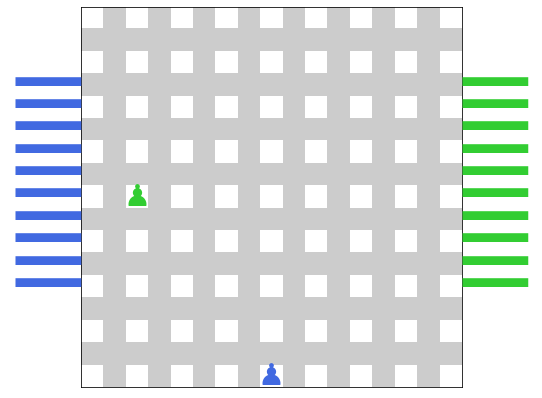

Player:  2 moved using the path
GAME OVER
Player 2 wins


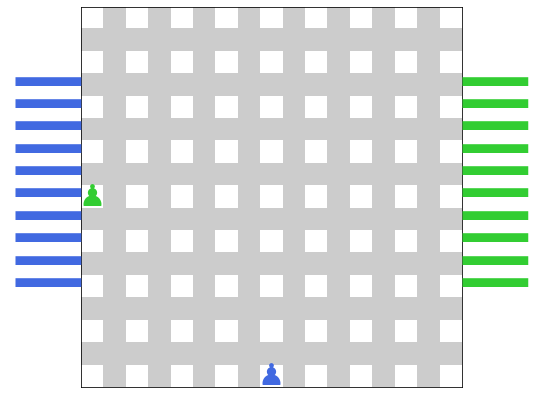

GAME OVER
Player 2 wins


In [11]:
#TEST CASE 1:
#Bot de DFS vs Bot de BFS SIN PAREDES
test1 = True

if test1:
    nop = 2
    g = Game(nop)
    g.drawQuoridorBoard()
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = bfspath2.findPathBFS(adj, p.players[1]) #camino generado con BFS
    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("El bot BFS", p.players[1].id, "tomará el camino:", path2)

    while g.checkWinner() != True:
        p.players[0].think_greedy(path1)
        g.game()
        p.players[1].move_from_path(path2)
        g.game()

In [12]:
#TEST CASE 4:
#Bot de DFS vs Bot de BFS2 SIN PAREDES
test4 = False

if test4:
    nop = 2
    g = Game(nop)
    g.drawQuoridorBoard()
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = bfspath2.findPathBFS(adj, p.players[1]) #camino generado con BFS
    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("El bot BFS", p.players[1].id, "tomará el camino:", path2)

    i = 0
    
    while g.checkWinner() != True:
        if i == 6:
            adj, mat = p.players[0].place_wall(3, 9, adj, mat, 'v')
            path1 = dfspath.findPathDFS(adj, p.players[0])
            path2 = bfspath2.findPathBFS(adj, p.players[1])
            print("Camino recalculado de DFS ", path1)
            print("Camino recalculado de BFS ", path2)
        p.players[0].move_from_path(path1)
        g.game()
        p.players[1].move_from_path(path2)
        g.game()
        i += 1
        

In [13]:
#TEST CASE 2:
test2 = False
#Bot de DFS vs Bot de backtracking CON PAREDES
#con paredes dinamicas
if test2:
    nop = 2
    g = Game(nop)
    g.drawQuoridorBoard()
    adj, mat = p.players[0].place_wall(15, 7, adj, mat, 'v')
    adj, mat = p.players[1].place_wall(1, 13, adj, mat, 'h')
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = backtrackingpath.backtracking(mat, p.players[1]) #camino generado por backtracking
    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("La cantidad de pasos son:", len(path1))
    print("El bot Backtracking", p.players[1].id, "tomará el camino:", path2)
    print("La cantidad de pasos son:", len(path2))
    i = 0
    while g.checkWinner() != True:
        #Cuando un jugador esté a dos movimientos de llegar, el otro jugador
        #pondra una pared para que se tenga que desviar
        #asi recalcularan sus caminos
        if i == 6:
            adj, mat = p.players[0].place_wall(3, 9, adj, mat, 'v')
            path1 = dfspath.findPathDFS(adj, p.players[0])
            path2 = backtrackingpath.backtracking(mat, p.players[1])
            print("Camino recalculado de DFS ", path1)
            print("Camino recalculado de Backtracking ", path2)
        if(g.checkWinner() != True):
            p.players[0].move_from_path(path1)
            g.game()
        if(g.checkWinner() != True):
            p.players[1].move_from_path_bk(path2)
            g.game()
        i+=1

In [14]:
#TEST CASE 3:
#Backtracking vs BFS vs DFS
#EL REAL CROSSOVER > Israel de Delfin Quishpe, La Tigresa y Wendy
#Paredes ya inicializadas
#Paredes dinamicas
test3 = False

if test3:
    nop = 4
    g = Game(nop)
    g.drawQuoridorBoard()
    adj, mat = p.players[0].place_wall(15, 7, adj, mat, 'v')
    adj, mat = p.players[1].place_wall(1, 13, adj, mat, 'h')
    adj, mat = p.players[2].place_wall(9, 15, adj, mat, 'h')
    adj, mat = p.players[3].place_wall(7, 1, adj, mat, 'h')
    path1 = dfspath.findPathDFS(adj, p.players[0]) #camino generado con DFS
    path2 = backtrackingpath.backtracking(mat, p.players[1]) #camino generado por bt
    path3 = dfspath.findPathDFS(adj, p.players[2]) #camino generado con DFS
    path4 = bfspath2.findPathBFS(adj, p.players[3]) #camino generado por bt

    print("El bot DFS", p.players[0].id, "tomará el camino:", path1)
    print("La cantidad de pasos son:", len(path1))
    print("El bot Backtracking", p.players[1].id, "tomará el camino:", path2)
    print("La cantidad de pasos son:", len(path2))
    print("El bot DFS", p.players[2].id, "tomará el camino:", path3)
    print("La cantidad de pasos son:", len(path3))
    print("El bot BFS", p.players[3].id, "tomará el camino:", path4)
    print("La cantidad de pasos son:", len(path4))

    i = 0
    while g.checkWinner() != True:
        #Cuando un jugador esté a dos movimientos de llegar, el otro jugador
        #pondra una pared para que se tenga que desviar
        #asi recalcularan sus caminos
        if i == 6:
            adj, mat = p.players[0].place_wall(3, 9, adj, mat, 'v')
            path1 = dfspath.findPathDFS(adj, p.players[0])
            path2 = backtrackingpath.backtracking(mat, p.players[1])
            path3 = dfspath.findPathDFS(adj, p.players[2])
            path4 = bfspath2.findPathBFS(adj, p.players[3])
            print("Camino recalculado de DFS ", path1)
            print("Camino recalculado de Backtracking ", path2)
            print("Camino recalculado de DFS ", path3)
            print("Camino recalculado de BFS ", path4)
        if(g.checkWinner() != True):
            p.players[0].move_from_path(path1)
            g.game()
        if(g.checkWinner() != True):
            p.players[1].move_from_path_bk(path2)
            g.game()
        if(g.checkWinner() != True):
            p.players[2].move_from_path(path3)
            g.game()
        if(g.checkWinner() != True):
            p.players[3].move_from_path(path4)
            g.game()
        i+=1
